In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt 

In [4]:
x_train=x_train/255 #scaling

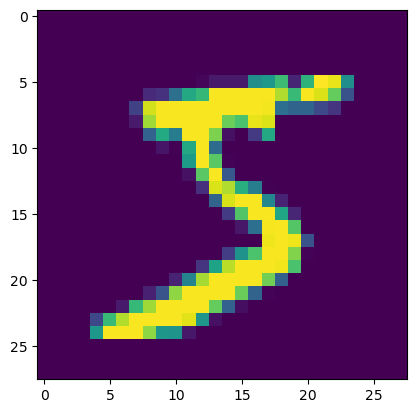

In [5]:
plt.imshow(x_train[0])


In [31]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))

In [32]:
model.add(Dense(784,activation="relu"))
model.add(Dense(50,activation="softmax"))
model.add(Dense(10,activation="softmax"))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 784)               615440    
                                                                 
 dense_10 (Dense)            (None, 50)                39250     
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 655200 (2.50 MB)
Trainable params: 655200 (2.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam')

In [35]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 1.3507 - val_loss: 0.8314
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.6361 - val_loss: 0.5185
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4523 - val_loss: 0.4386
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3891 - val_loss: 0.4094
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3503 - val_loss: 0.3417
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1837 - val_loss: 0.1690
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0932 - val_loss: 0.1329
Epoch 8/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0683 - val_loss: 0.1197
Epoch 9/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0532 - val_loss: 0.1139
Epoch 10/10
1500/1500 [==============================] - 12s 8ms/step - lo

In [36]:
y_pob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [37]:
y=y_pob.argmax(axis=1)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_test)

0.9779

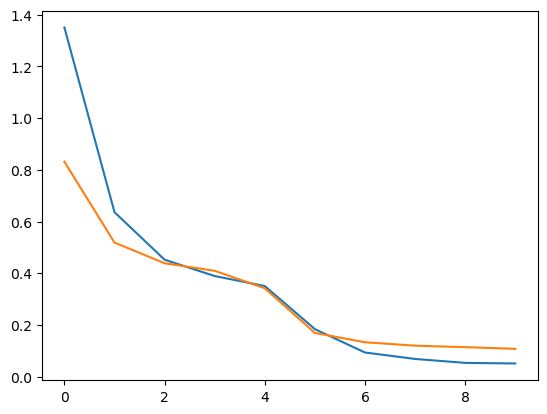

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])